In [210]:
import pandas as pd

# Carregar os dados
orders = pd.read_csv("downloads/olist_orders_dataset.csv")
order_items = pd.read_csv("downloads/olist_order_items_dataset.csv")
payments = pd.read_csv("downloads/olist_order_payments_dataset.csv")
reviews = pd.read_csv("downloads/olist_order_reviews_dataset.csv")
products = pd.read_csv("downloads/olist_products_dataset.csv")
categories = pd.read_csv("downloads/product_category_name_dataset.csv")
customers = pd.read_csv("downloads/olist_customers_dataset.csv")
geolocation = pd.read_csv("downloads/olist_geolocation_dataset.csv")
sellers = pd.read_csv("downloads/olist_sellers_dataset.csv")

# Traduzir categorias
products = products.merge(categories, on='product_category_name', how='left')

# Reduzir geolocation para um CEP único por cidade/estado
geo_reduzido = geolocation.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})
geo_reduzido = geo_reduzido.groupby('customer_zip_code_prefix')[['geolocation_city', 'geolocation_state']].first().reset_index()

# Unir localização aos clientes
customers = customers.merge(geo_reduzido, on='customer_zip_code_prefix', how='left')

# Unir tudo em um super DataFrame
df = orders.merge(customers, on='customer_id', how='left')
df = df.merge(order_items, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(reviews, on='order_id', how='left')
df = df.merge(sellers, on='seller_id', how='left')


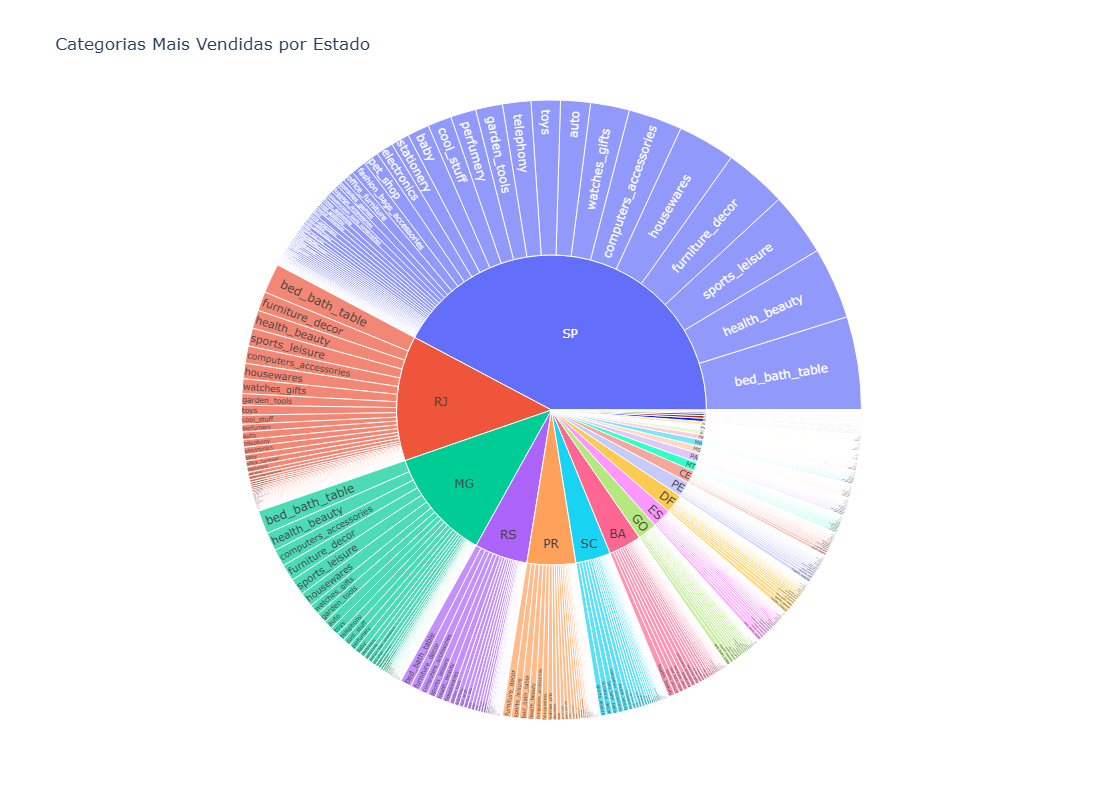

In [218]:
categorias_estado = df.groupby(['geolocation_state', 'product_category_name_english'])['order_id'].count().reset_index()
categorias_estado.columns = ['Estado', 'Categoria', 'Pedidos']

import plotly.express as px
fig = px.sunburst(categorias_estado, path=['Estado', 'Categoria'], values='Pedidos',
                  title='Categorias Mais Vendidas por Estado',    width=1000,
    height=800
)
fig.show()

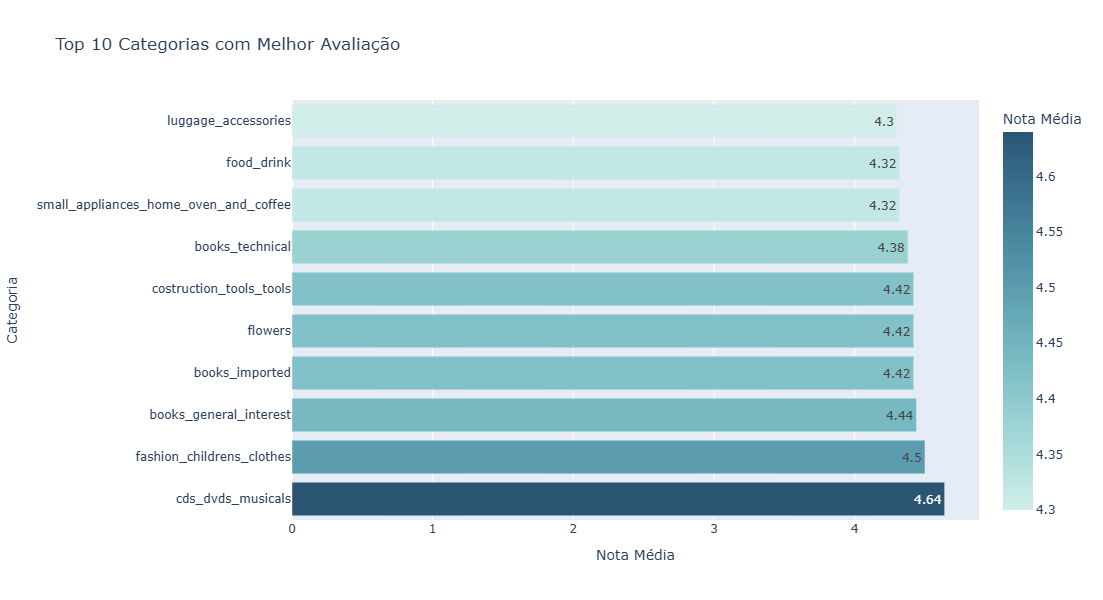

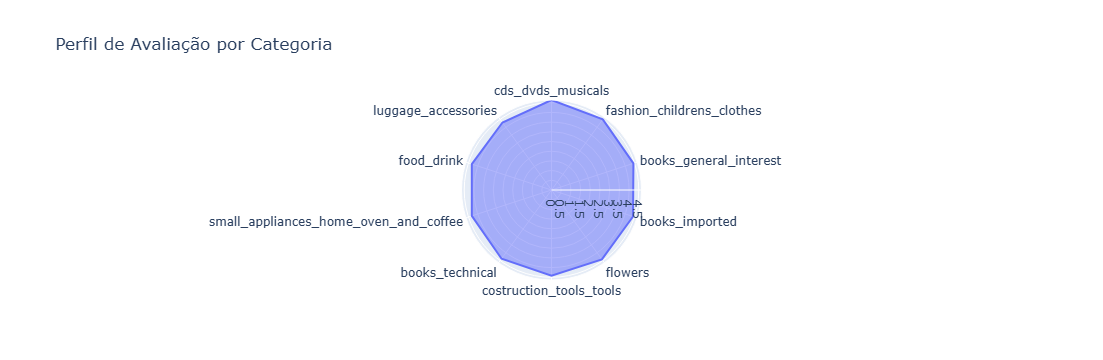

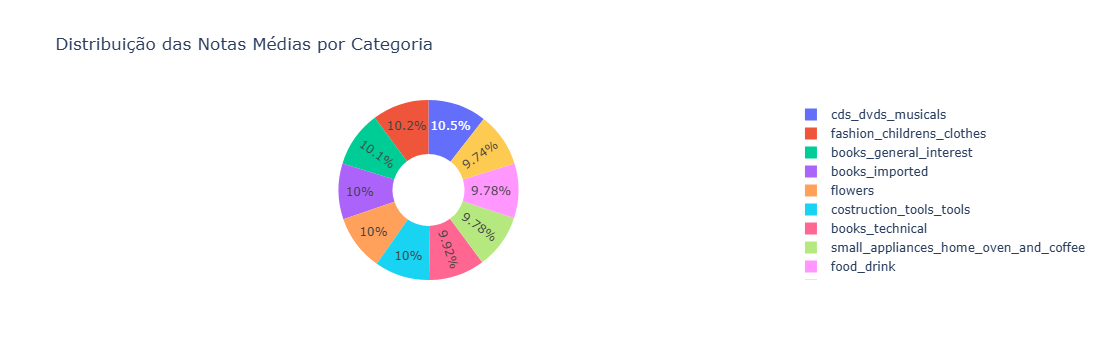

In [220]:
import plotly.express as px

top_categorias = df.groupby('product_category_name_english')['review_score'].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_categorias.columns = ['Categoria', 'Nota Média']

fig = px.bar(top_categorias, x='Nota Média', y='Categoria',
             orientation='h', title='Top 10 Categorias com Melhor Avaliação',
             text='Nota Média', color='Nota Média', color_continuous_scale='Teal')
fig.update_layout(height=600)
fig.show()

#grafico radar
fig = px.line_polar(top_categorias, r='Nota Média', theta='Categoria',
                    line_close=True, title='Perfil de Avaliação por Categoria')
fig.update_traces(fill='toself')
fig.show()

# grafico rosca

fig = px.pie(top_categorias, names='Categoria', values='Nota Média',
             title='Distribuição das Notas Médias por Categoria',
             hole=0.4)
fig.show()

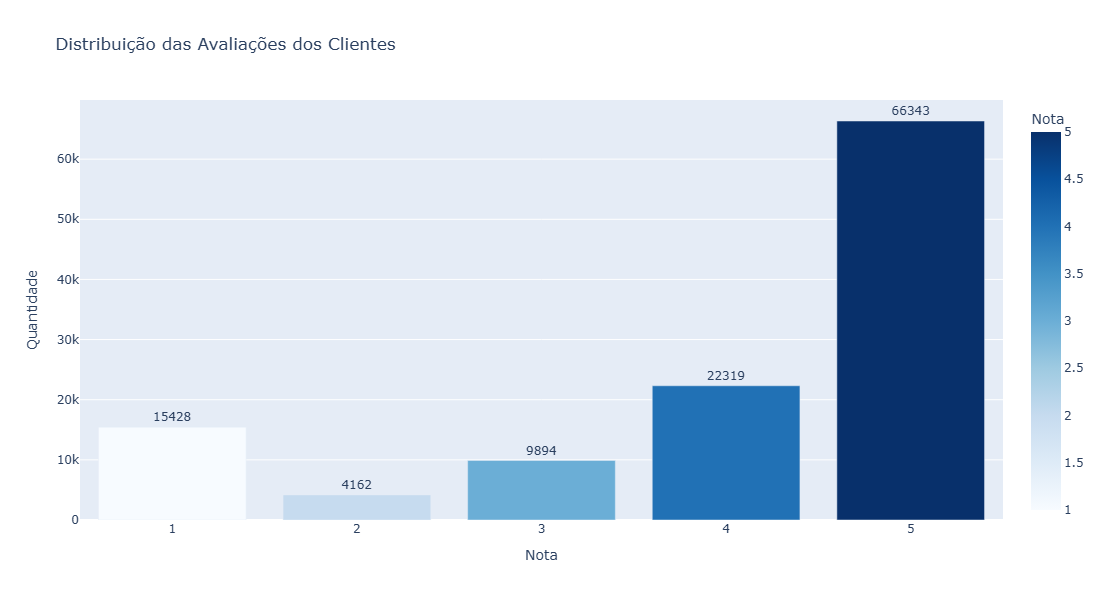

In [221]:
df['review_score'].value_counts().sort_index()


notas = df['review_score'].value_counts().sort_index().reset_index()
notas.columns = ['Nota', 'Quantidade']

fig = px.bar(notas, x='Nota', y='Quantidade',
             title='Distribuição das Avaliações dos Clientes',
             text='Quantidade', color='Nota',
             color_continuous_scale='Blues',
             width=900, height=600)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis=dict(dtick=1))
fig.show()

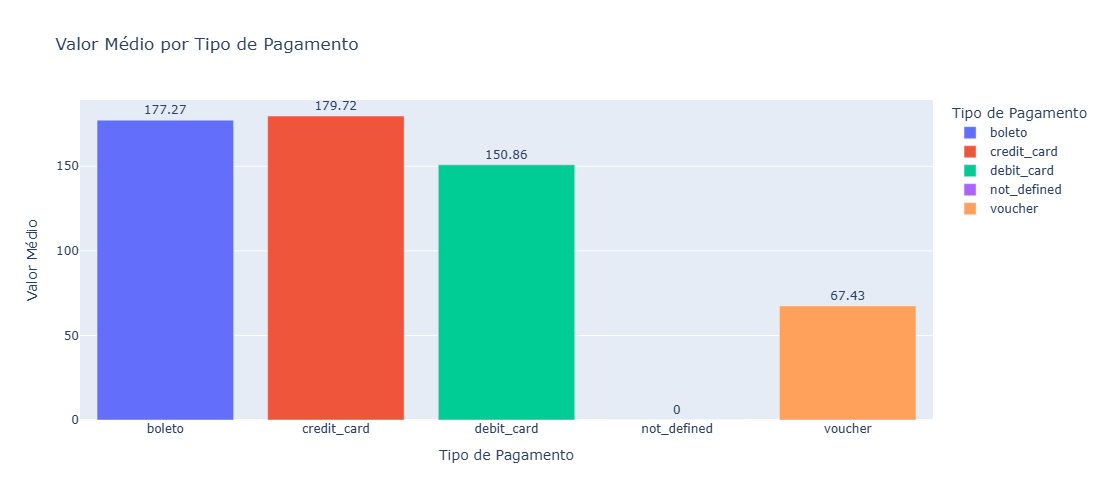

In [222]:
df.groupby('payment_type')['payment_value'].mean().round(2)

pagamentos = df.groupby('payment_type')['payment_value'].mean().round(2).reset_index()
pagamentos.columns = ['Tipo de Pagamento', 'Valor Médio']

fig = px.bar(pagamentos, x='Tipo de Pagamento', y='Valor Médio',
             title='Valor Médio por Tipo de Pagamento',
             text='Valor Médio', color='Tipo de Pagamento',
             width=800, height=500)

fig.update_traces(textposition='outside')
fig.show()

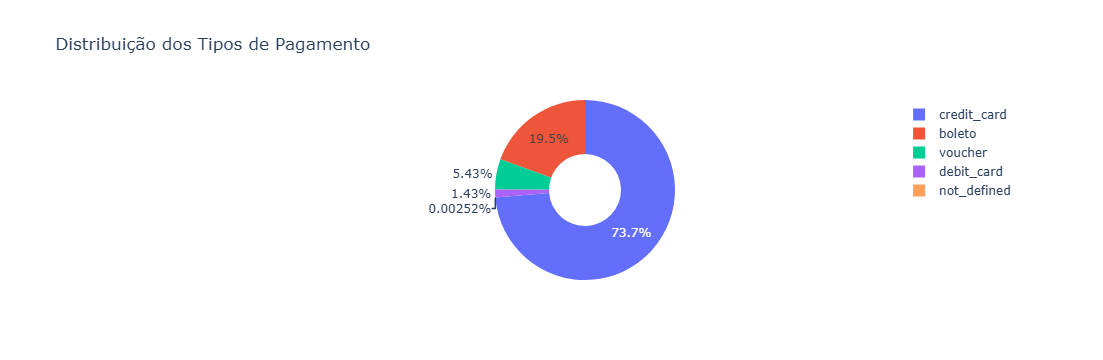

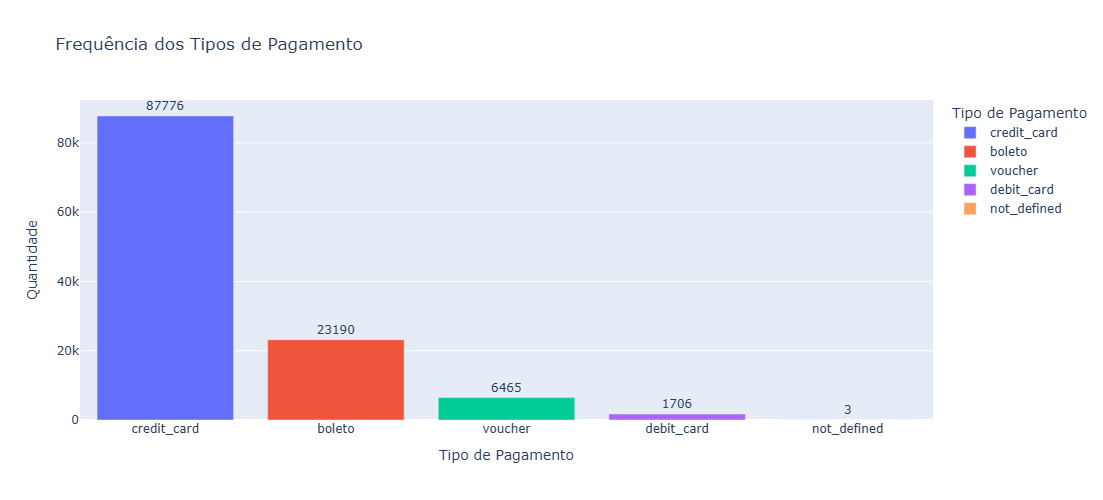

In [223]:
pagamento_freq = df['payment_type'].value_counts().reset_index()
pagamento_freq.columns = ['Tipo de Pagamento', 'Quantidade']

fig = px.pie(pagamento_freq, names='Tipo de Pagamento', values='Quantidade',
             title='Distribuição dos Tipos de Pagamento',
             hole=0.4)
fig.show()


fig = px.bar(pagamento_freq, x='Tipo de Pagamento', y='Quantidade',
             title='Frequência dos Tipos de Pagamento',
             text='Quantidade', color='Tipo de Pagamento',
             width=800, height=500)

fig.update_traces(textposition='outside')
fig.show()